# owid_co2_data

# Author: Joe Muscolino
#### Updated: 10/16/2023

## Introduction
The purpose of this Exploratory Data Analysis (EDA) is to generate further insights around the rapidly growing concern of global GHG emissions. To perform this analysis, data was gathered from the *Our World in Data CO2 and Greenhouse Gas Emissions* database (visit OurWorldInData.org to learn more) to gather insights regarding the increase in GHG emissions over the past 2 centuries.

Metric tons of carbon dioxide equivalent or MTCO2e is the unit of measurement in this tool. The unit "CO2e" represents an amount of a GHG whose atmospheric impact has been standardized to that of one unit mass of carbon dioxide (CO2), based on the global warming potential (GWP) of the gas.


#### Citations
Hannah Ritchie, Max Roser and Pablo Rosado (2020) - "CO₂ and Greenhouse Gas Emissions". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/co2-and-greenhouse-gas-emissions' [Online Resource]

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from matplotlib import rcParams
import matplotlib.pyplot as plt
import random
from datetime import datetime

# Introduction
Metric tons of carbon dioxide equivalent or MTCO2e is the unit of measurement in this tool. The unit "CO2e" represents an amount of a GHG whose atmospheric impact has been standardized to that of one unit mass of carbon dioxide (CO2), based on the global warming potential (GWP) of the gas.


#### Citations
Hannah Ritchie, Max Roser and Pablo Rosado (2020) - "CO₂ and Greenhouse Gas Emissions". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/co2-and-greenhouse-gas-emissions' [Online Resource]

# 1. Data Exploration and Cleaning

In [2]:
co2_df = pd.read_csv("owid-co2-data.csv")

In [3]:
co2_df.shape

(50598, 79)

In [4]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50598 entries, 0 to 50597
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50598 non-null  object 
 1   year                                       50598 non-null  int64  
 2   iso_code                                   42142 non-null  object 
 3   population                                 40008 non-null  float64
 4   gdp                                        14564 non-null  float64
 5   cement_co2                                 24974 non-null  float64
 6   cement_co2_per_capita                      22714 non-null  float64
 7   co2                                        31349 non-null  float64
 8   co2_growth_abs                             28944 non-null  float64
 9   co2_growth_prct                            25032 non-null  float64
 10  co2_including_luc     

In [5]:
# View first 5 rows of DataFrame
co2_df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
# Get Percent of missing data in each column, convert the missing_data from a 
# decimal to a percentage and round to 2 decimal places.
missing_data = round(co2_df.isna().sum() / len(co2_df) * 100, 2)
missing_data

country 0.00
year 0.00
iso_code 16.71
population 20.93
gdp 71.22
 ... 
temperature_change_from_n2o 25.65
total_ghg 87.85
total_ghg_excluding_lucf 87.85
trade_co2 91.58
trade_co2_share 91.58
Length: 79, dtype: float64

In [7]:
# Parse index of the Series missing_data and check how much data is missing from column, if 98% or more is missing, drop it. 
for col in missing_data.index:
    if missing_data[col] >= 85:
        co2_df.drop(columns=[col], inplace=True)

co2_df.shape

(50598, 60)

In [8]:
co2_df.describe()

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o
count,50598.000000,4.000800e+04,1.456400e+04,24974.000000,22714.000000,31349.000000,28944.000000,25032.000000,24218.000000,23917.000000,...,23421.000000,15980.000000,21990.000000,39388.000000,23421.000000,41724.000000,37620.000000,41724.000000,41724.000000,37620.000000
mean,1925.365173,5.926810e+07,2.677586e+11,8.392491,0.063958,380.237549,5.716527,20.492413,499.312724,7.204133,...,3.344629,2.085217,2.827082,2.561769,3.328371,2.190116,0.002956,0.006886,0.010069,0.000497
std,59.882945,3.222866e+08,2.103151e+12,63.009433,0.123023,1801.527942,58.764604,699.580857,2081.497921,92.866497,...,13.024224,9.106761,13.721541,10.092255,12.828399,9.008552,0.016073,0.039684,0.057186,0.002943
min,1750.000000,2.100000e+01,4.998000e+07,0.000000,0.000000,0.000000,-1818.472000,-100.000000,-187.032000,-2317.996000,...,0.000000,0.000000,0.000000,-6.498000,0.000000,-0.899000,-0.001000,0.000000,-0.001000,0.000000
25%,1882.000000,3.198618e+05,7.516679e+09,0.000000,0.000000,0.125000,0.000000,-0.541500,4.646000,-0.572000,...,0.004000,0.000000,0.000000,0.001000,0.005000,0.003000,0.000000,0.000000,0.000000,0.000000
50%,1929.000000,2.323117e+06,2.597999e+10,0.010000,0.005000,3.109000,0.015000,3.783500,24.417000,0.062000,...,0.053000,0.000000,0.000000,0.072000,0.061000,0.071000,0.000000,0.000000,0.000000,0.000000
75%,1975.000000,9.802751e+06,1.132942e+11,0.692000,0.087000,43.730000,0.773000,10.569000,113.381250,2.325000,...,0.493000,0.051000,0.123000,0.485000,0.518000,0.329000,0.001000,0.001000,0.001000,0.000000
max,2021.000000,7.909295e+09,1.136302e+14,1672.592000,2.574000,37123.852000,1859.764000,102318.508000,41639.840000,2246.723000,...,100.000000,100.000000,100.000000,100.675000,100.000000,100.000000,0.415000,1.113000,1.611000,0.083000


# 2. Data Analysis and Visualizations

In [52]:
# Get a new dataframe which only contains data for the whole world
world_data = co2_df[co2_df["country"] == 'World']

# Drop rows missing data in the population or co2 columns.
world_population_data = world_data.dropna(subset=['population', 'co2']).reset_index(drop=True)

# Group data by year.
world_population_by_year = world_population_data.groupby("year").aggregate({"population":"sum", "co2":"sum", "co2_per_gdp":"sum", "co2_per_capita": "sum", "gdp":"sum", "co2_growth_prct":"max"})
world_population_by_year.head()

,population,co2,co2_per_gdp,co2_per_capita,gdp,co2_growth_prct
year,,,,,,
1750,745664133.0,9.351,0.0,0.013,0.0,NaN
1760,779891857.0,10.017,0.0,0.013,0.0,0.000
1770,818827900.0,12.274,0.0,0.015,0.0,0.030
1780,891048681.0,15.055,0.0,0.017,0.0,0.049
1790,931577684.0,19.177,0.0,0.021,0.0,0.038


In [53]:
world_population_data.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o
0,World,1750,NaN,745664133.0,NaN,NaN,NaN,9.351,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,World,1760,NaN,779891857.0,NaN,NaN,NaN,10.017,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,World,1770,NaN,818827900.0,NaN,NaN,NaN,12.274,0.004,0.030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,World,1780,NaN,891048681.0,NaN,NaN,NaN,15.055,0.007,0.049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,World,1790,NaN,931577684.0,NaN,NaN,NaN,19.177,0.007,0.038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Global CO2 Emissions and Population

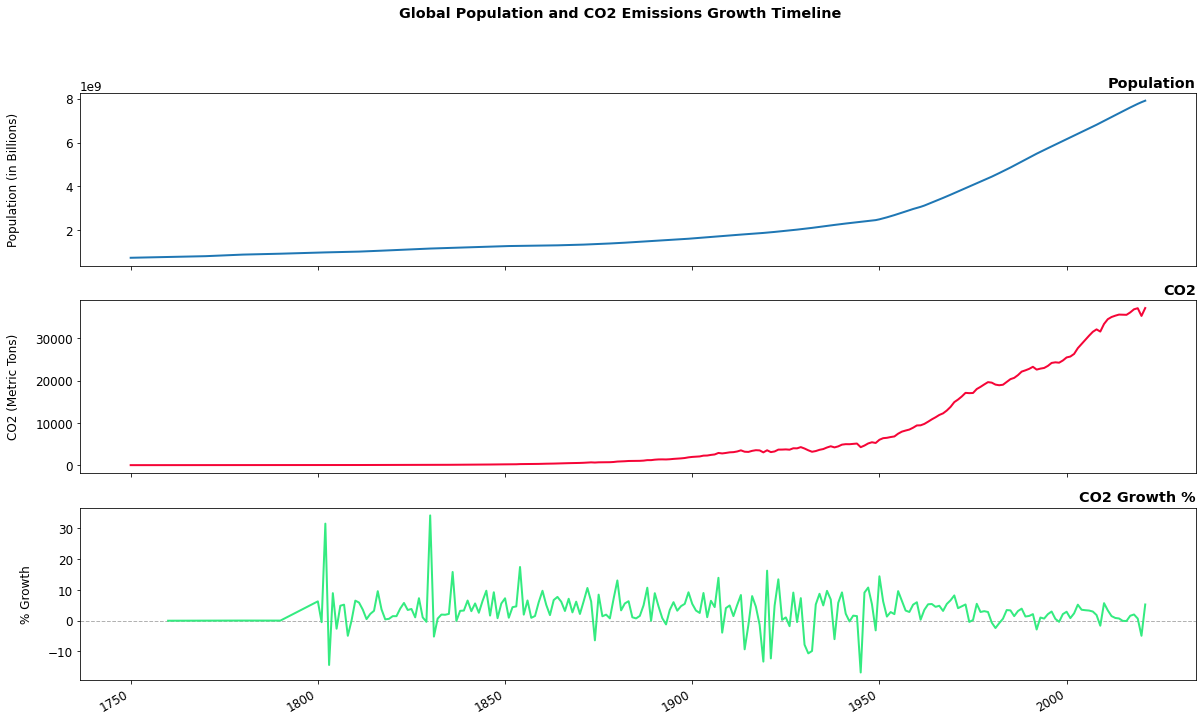

In [55]:
# Plot World Population and CO2 Emissions
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(3, sharex=True,figsize=(20,12))
fig.suptitle('Global Population and CO2 Emissions Growth Timeline',fontweight='bold')

# Population
axs[0].plot(world_population_by_year.index.to_list(), world_population_by_year["population"],linewidth ='2.0')
# CO2 Emissions
axs[1].plot(world_population_by_year.index.to_list(), world_population_by_year["co2"], color="#F50537",linewidth ='2.0')
# CO2 Growth %
axs[2].axhline(linewidth=1, color='black', linestyle = '--', alpha=0.3)
axs[2].plot(world_population_by_year.index.to_list(), world_population_by_year["co2_growth_prct"], color="#34eb80",linewidth ='2.0')
# Set plot title
axs[0].set_title('Population', loc='right',fontweight='bold')
axs[1].set_title('CO2', loc='right',fontweight='bold')
axs[2].set_title('CO2 Growth %', loc='right',fontweight='bold')

# Set axis labels
axs[0].set_ylabel('Population (in Billions)', labelpad=45)
axs[1].set_ylabel('CO2 (Metric Tons)', labelpad=15)
axs[2].set_ylabel('% Growth', labelpad=15)

plt.gcf().autofmt_xdate()
plt.show()

### Global CO2 Emissions vs Global Population

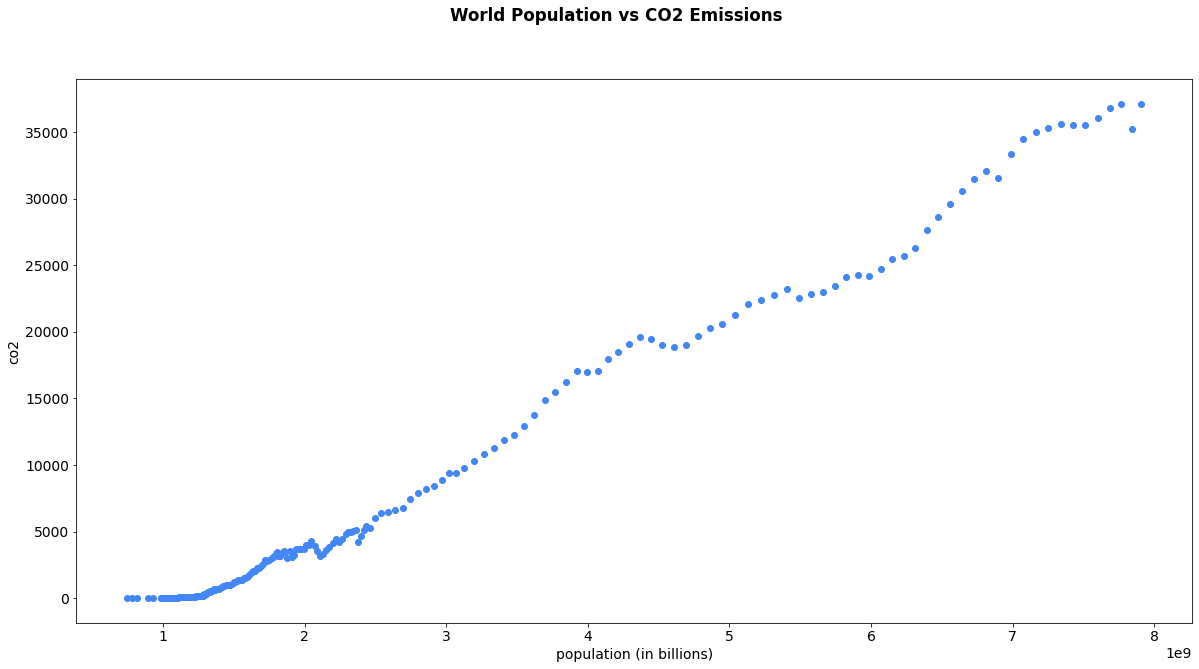

In [11]:
# Plot Data
plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(figsize=(20, 10))
fig.suptitle('World Population vs CO2 Emissions',fontweight='bold')
axs.scatter(x=world_population_data["population"], y=world_population_data["co2"], color="#4287f5")
axs.set_ylabel("co2")   
axs.set_xlabel("population (in billions)")
plt.show()

### Global CO2, Population, and GDP Timeline

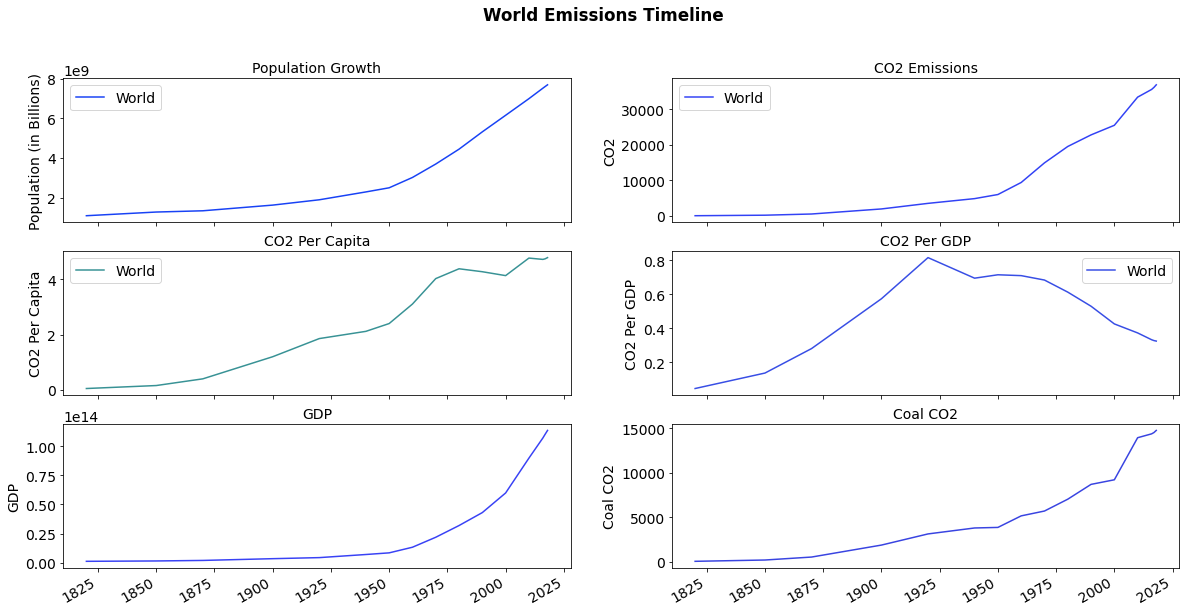

In [12]:
# Create new DataFrame copy where the data is grouped by Country and Year. 
temp = co2_df[co2_df["gdp"] > 0]
country_totals = temp.groupby(["country", "year"]).aggregate({"population":"sum", "co2":"sum", "co2_per_gdp":"sum", "co2_per_capita": "sum", "gdp":"sum", "coal_co2":"sum"})
world = country_totals.loc["World"]

# Plot Data
plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
fig.suptitle('World Emissions Timeline',fontweight='bold')

# Population
axs[0,0].plot(world.index.to_list(), world["population"], color="#1842f5")

# Co2 
axs[0,1].plot(world.index.to_list(), world["co2"], color="#3242f5")

# co2_per_gdp
axs[1,1].plot(world.index.to_list(), world["co2_per_gdp"], color="#384ee5")

# co2_per_capita
axs[1,0].plot(world.index.to_list(), world["co2_per_capita"], color="#389295")

# GDP
axs[2,0].plot(world.index.to_list(), world["gdp"], color="#3942f5")

# coal_co2
axs[2,1].plot(world.index.to_list(), world["coal_co2"], color="#3944e1")

# Set plot title
axs[0,0].set_title('Population Growth',fontsize='medium')
axs[0,1].set_title('CO2 Emissions',fontsize='medium')
axs[1,0].set_title('CO2 Per Capita',fontsize='medium')
axs[1,1].set_title('CO2 Per GDP',fontsize='medium')
axs[2,0].set_title('GDP',fontsize='medium')
axs[2,1].set_title('Coal CO2',fontsize='medium')


# Set axis labels
axs[0,0].set_ylabel('Population (in Billions)')
axs[0,1].set_ylabel('CO2')
axs[1,1].set_ylabel('CO2 Per GDP')
axs[1,0].set_ylabel('CO2 Per Capita')
axs[2,0].set_ylabel('GDP')
axs[2,1].set_ylabel('Coal CO2')

plt.gcf().autofmt_xdate()
plt.show()

## Emissions & Population by Country

In [15]:
countries_drop = ["World","High-income countries","OECD (GCP)","Non-OECD (GCP)","Upper-middle-income countries","European Union (27)","European Union (28)",
                  "Middle East (GCP)","Lower-middle-income countries","European Union (27) (GCP)","Europe (excl. EU-28)","Europe (excl. EU-27)",
                  "Asia (excl. China and India)","Asia (GCP)", "North America", "North America (GCP)", "Asia", "Europe", "Europe (GCP)",
                  "North America (excl. USA)", "Africa (GCP)", "Africa","South America", "South America (GCP)", "International transport"]

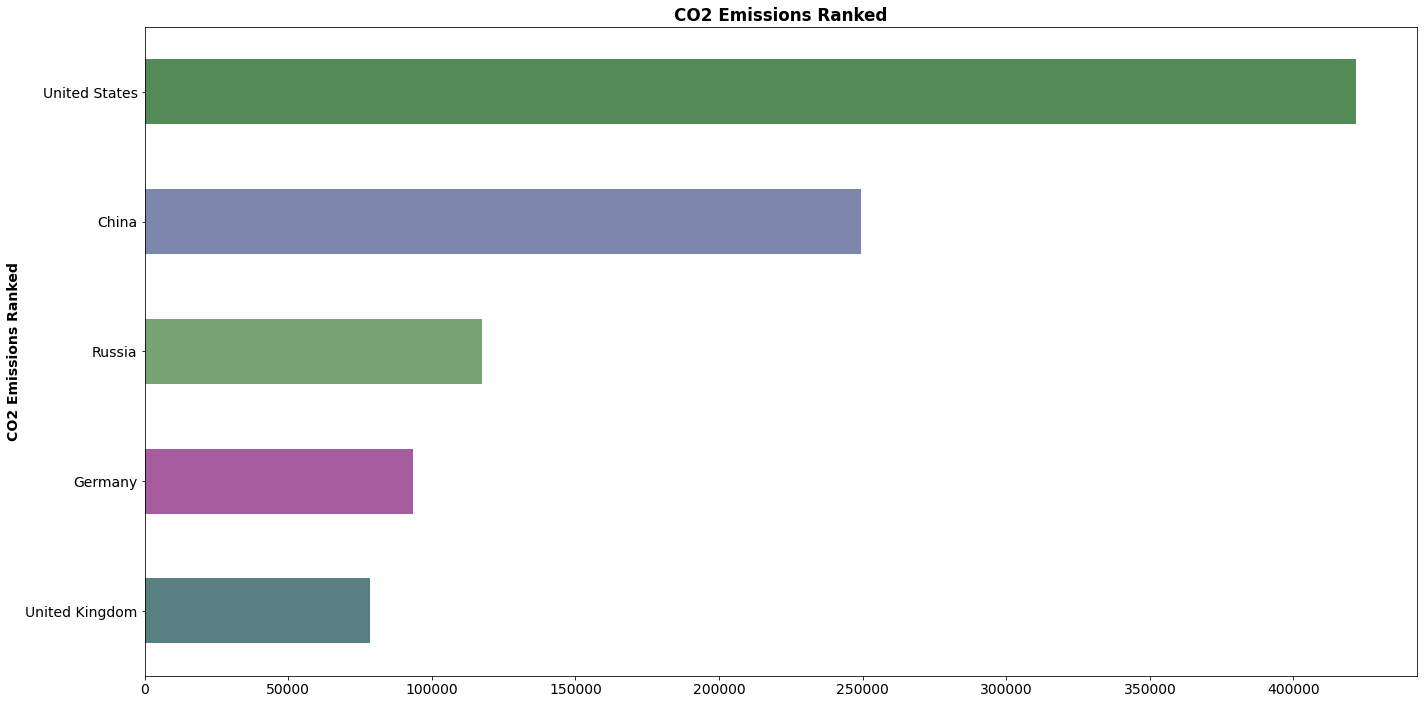

In [16]:
# Drop missing co2 data
no_missing_co2 = co2_df.dropna(subset=["co2"])
no_missing_co2 = no_missing_co2[~no_missing_co2["country"].isin(countries_drop)]

# Group data by Country
group_country = no_missing_co2.groupby("country").aggregate({"co2":"sum"})

# Get top 25 countries according to co2 emissions
top5_by_co2 = group_country.sort_values(by="co2", ascending=False)[:5]

# Random Color Generator
colors = []
random.seed(100)
for i in range(0, len(top5_by_co2)):
    r = lambda: random.randint(70, 175)
    colors.append('#%02X%02X%02X' % (r(), r(), r()))

# Sort Values so that the y-axis is in descending order when plotting
top5_by_co2["co2"].sort_values(ascending=True).plot(kind="barh", figsize=(20,10), color=colors)

# Set plot title
plt.title('CO2 Emissions Ranked',fontweight='bold')
plt.ylabel('CO2 Emissions Ranked',fontweight='bold')

plt.tight_layout()
plt.show()

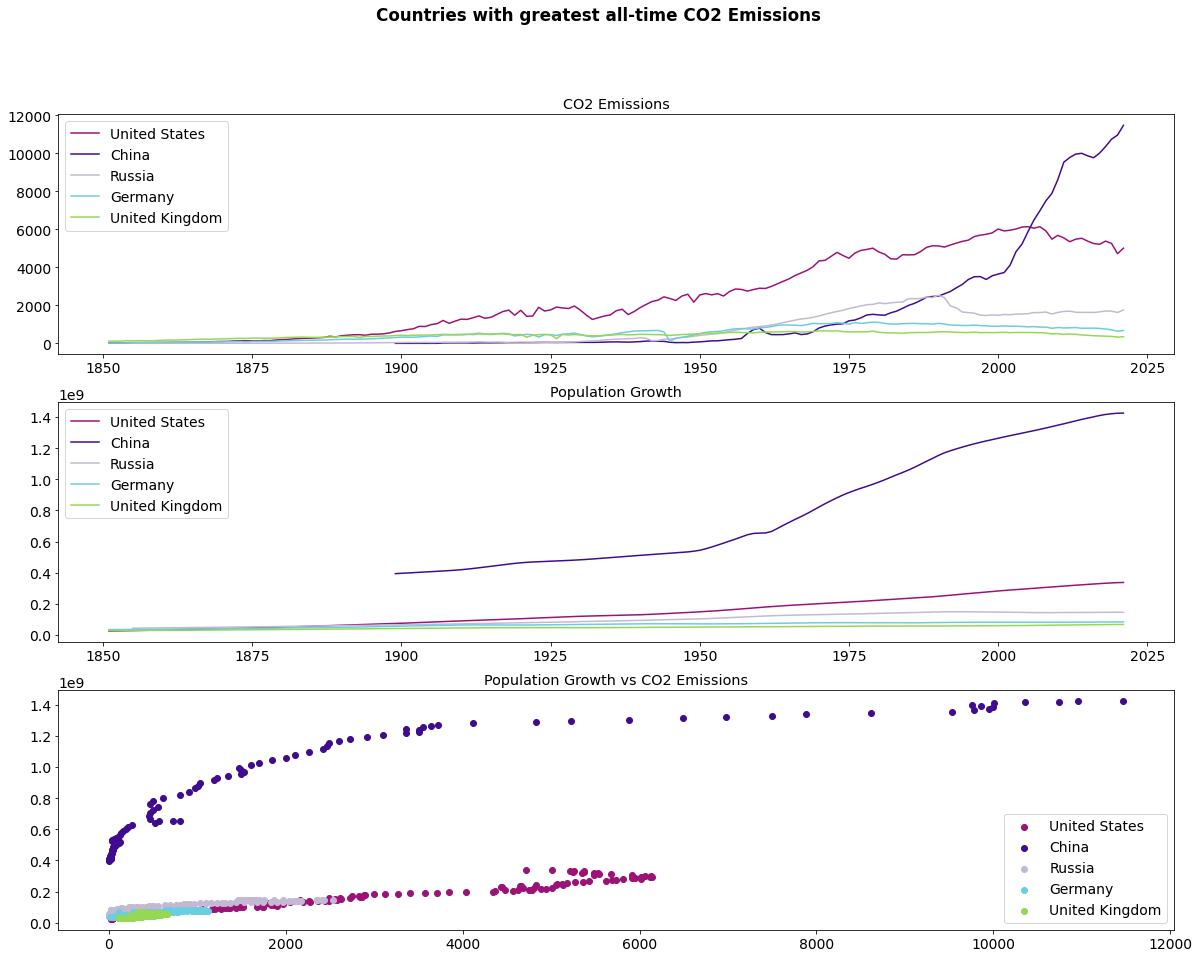

In [64]:
# Create new DataFrame copy where the data is grouped by Country and Year. 
countries_only_df = co2_df[~co2_df["country"].isin(countries_drop)]
countries_only_df = countries_only_df.dropna(subset=["co2","population"])
after1850 = countries_only_df[countries_only_df["year"] > 1850]

country_totals = after1850.groupby(["country", "year"]).aggregate({"population":"sum", "co2":"sum", "co2_per_gdp":"sum", "co2_per_capita": "sum", "gdp":"sum"})
# Plot Data
plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(3,figsize=(20, 15))
fig.suptitle('Countries with greatest all-time CO2 Emissions',fontweight='bold')

# Population comparison
seed = 10
for country in top5_by_co2.index.to_list():
    temp_country_df = country_totals.loc[country]
    random.seed(seed)
    r = lambda: random.randint(10, 225)
    color = '#%02X%02X%02X' % (r(), r(), r())
    axs[0].plot(temp_country_df.index.to_list(), temp_country_df["co2"], color=color)
    axs[1].plot(temp_country_df.index.to_list(), temp_country_df["population"], color=color)
    axs[2].scatter(x=temp_country_df["co2"], y=temp_country_df["population"], color=color)
    seed += 5


axs[0].legend(top5_by_co2.index.to_list())
axs[1].legend(top5_by_co2.index.to_list())
axs[2].legend(top5_by_co2.index.to_list())


plt.rcParams.update({'font.size': 12})
axs[0].set_title("CO2 Emissions")
axs[1].set_title("Population Growth")
axs[2].set_title("Population Growth vs CO2 Emissions")
plt.show()

## USA, China, Russia

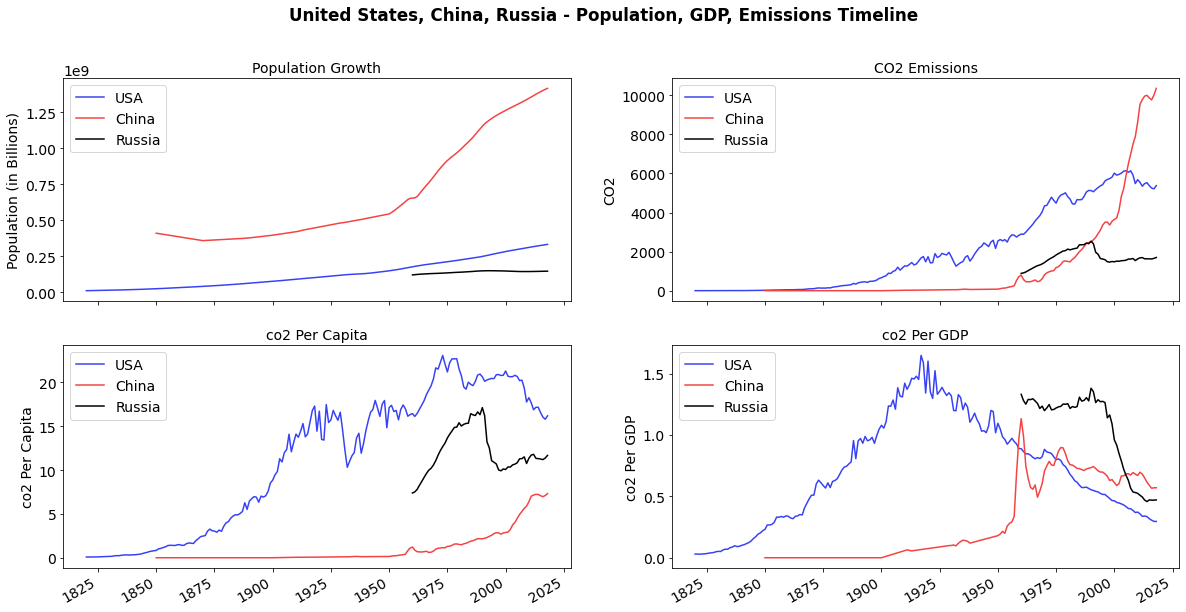

In [31]:
# Create new DataFrame copy where the data is grouped by Country and Year. 
temp = co2_df[co2_df["gdp"] > 0]
country_totals = temp.groupby(["country", "year"]).aggregate({"population":"sum", "co2":"sum", "co2_per_gdp":"sum", "co2_per_capita": "sum", "gdp":"sum"})
usa_co2 = country_totals.loc["United States"]
china_co2 = country_totals.loc["China"]
russia_co2 = country_totals.loc["Russia"]

plt.rcParams.update({'font.size': 14})

# Plot Data
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('United States, China, Russia - Population, GDP, Emissions Timeline',fontweight='bold')

# Population comparison
axs[0,0].plot(usa_co2.index.to_list(), usa_co2["population"], color="#3842f5")
axs[0,0].plot(china_co2.index.to_list(), china_co2["population"], color="#f54242")
axs[0,0].plot(russia_co2.index.to_list(), russia_co2["population"], color="black")

# Co2 comparison
axs[0,1].plot(usa_co2.index.to_list(), usa_co2["co2"], color="#3842f5")
axs[0,1].plot(china_co2.index.to_list(), china_co2["co2"], color="#f54242")
axs[0,1].plot(russia_co2.index.to_list(), russia_co2["co2"], color="black")

# GDP comparison
axs[1,1].plot(usa_co2.index.to_list(), usa_co2["co2_per_gdp"], color="#3842f5")
axs[1,1].plot(china_co2.index.to_list(), china_co2["co2_per_gdp"], color="#f54242")
axs[1,1].plot(russia_co2.index.to_list(), russia_co2["co2_per_gdp"], color="black")

# GDP comparison
axs[1,0].plot(usa_co2.index.to_list(), usa_co2["co2_per_capita"], color="#3842f5")
axs[1,0].plot(china_co2.index.to_list(), china_co2["co2_per_capita"], color="#f54242")
axs[1,0].plot(russia_co2.index.to_list(), russia_co2["co2_per_capita"], color="black")

# Set plot title
axs[0,0].set_title('Population Growth',fontsize='medium')
axs[0,1].set_title('CO2 Emissions',fontsize='medium')
axs[1,0].set_title('co2 Per Capita',fontsize='medium')
axs[1,1].set_title('co2 Per GDP',fontsize='medium')

# Set legend
axs[0,0].legend(["USA", "China", "Russia"])
axs[0,1].legend(["USA", "China", "Russia"])
axs[1,1].legend(["USA", "China", "Russia"])
axs[1,0].legend(["USA", "China", "Russia"])

# Set axis labels
axs[0,0].set_ylabel('Population (in Billions)')
axs[0,1].set_ylabel('CO2')
axs[1,1].set_ylabel('co2 Per GDP')
axs[1,0].set_ylabel('co2 Per Capita')


plt.gcf().autofmt_xdate()
plt.show()

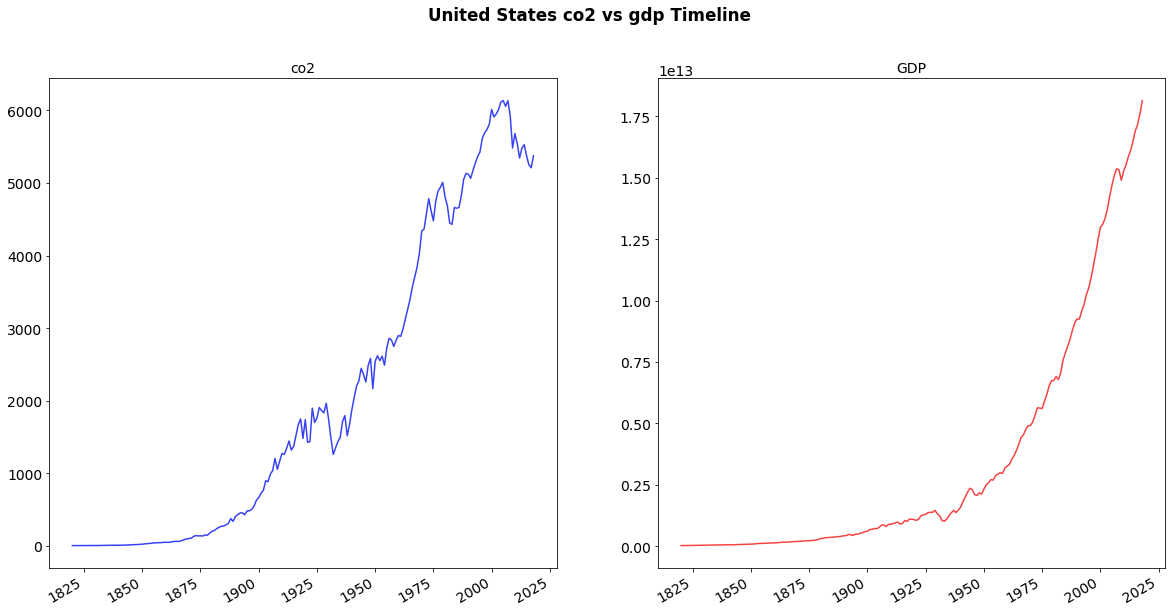

In [32]:
# Plot Data
plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(1,2, figsize=(20, 10))
fig.suptitle('United States co2 vs gdp Timeline',fontweight='bold')

# Population comparison
axs[0].plot(usa_co2.index.to_list(), usa_co2["co2"], color="#3842f5")
axs[1].plot(usa_co2.index.to_list(), usa_co2["gdp"], color="#f54242")

axs[0].set_title('co2',fontsize='medium')
axs[1].set_title('GDP',fontsize='medium')


plt.gcf().autofmt_xdate()
plt.show()

## Temperature Change

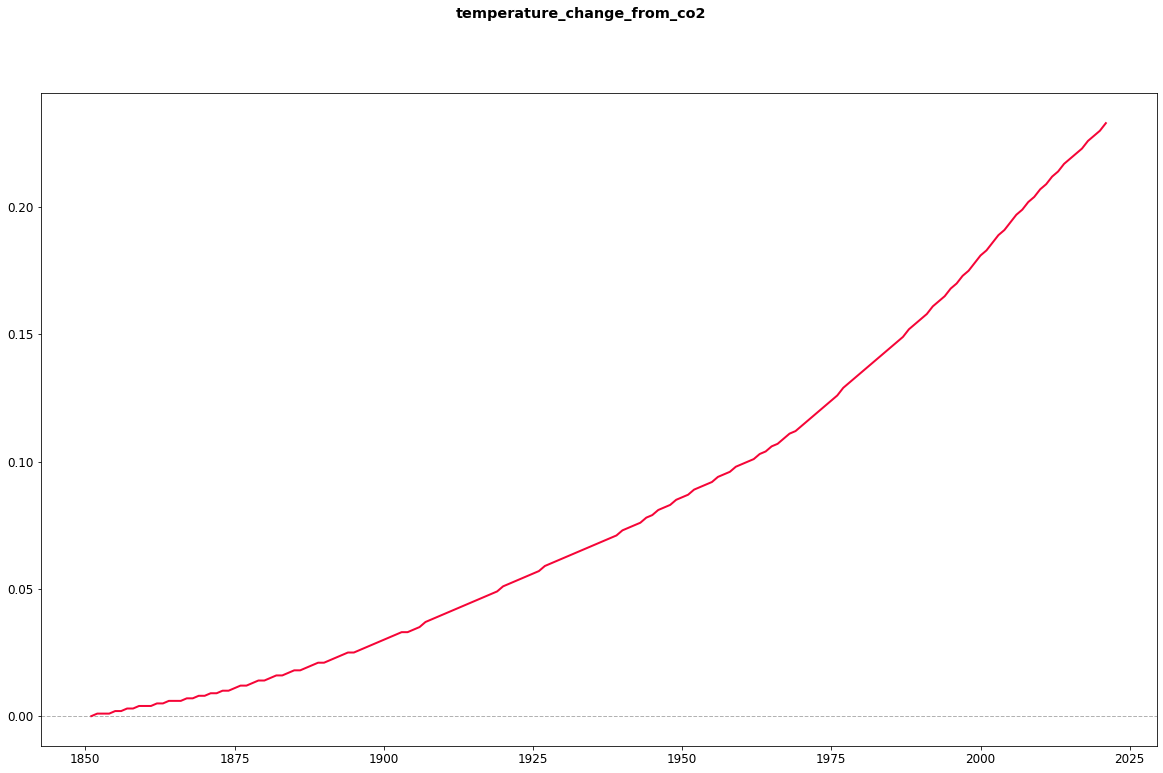

In [73]:
temperatures = co2_df.dropna(subset=["temperature_change_from_co2"])
country_temps = temperatures.groupby(["country", "year"]).aggregate({"temperature_change_from_co2":"sum"})
usa_temp_change = country_temps.loc["United States"]

# Plot World Population and CO2 Emissions
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(sharex=True,figsize=(20,12))
fig.suptitle('temperature_change_from_co2',fontweight='bold')

axs.axhline(linewidth=1, color='black', linestyle = '--', alpha=0.3)
axs.plot(usa_temp_change.index.to_list(), usa_temp_change["temperature_change_from_co2"], color="#F50537",linewidth ='2.0')
plt.show()

# United States Data

In [18]:
us_climate_data = pd.read_csv("climatewatch-usemissions2.csv")

In [19]:
us_climate_data.shape

(1508, 23)

In [20]:
us_climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   State                                            1508 non-null   object 
 1   Year                                             1508 non-null   int64  
 2   Total GHG Emissions Excluding LUCF (MtCO2e)      1508 non-null   float64
 3   Total GHG Emissions Including LUCF (MtCO2e)      1508 non-null   float64
 4   Total CO2 (excluding LUCF) (MtCO2e)              1508 non-null   float64
 5   Total CH4 (MtCO2e)                               1508 non-null   float64
 6   Total N2O (MtCO2e)                               1508 non-null   float64
 7   Total F-Gas (MtCO2e)                             1508 non-null   float64
 8   Energy (MtCO2e)                                  1508 non-null   float64
 9   Industrial Processes (MtCO2e) 

In [21]:
us_climate_data.head()

,State,Year,Total GHG Emissions Excluding LUCF (MtCO2e),Total GHG Emissions Including LUCF (MtCO2e),Total CO2 (excluding LUCF) (MtCO2e),Total CH4 (MtCO2e),Total N2O (MtCO2e),Total F-Gas (MtCO2e),Energy (MtCO2e),Industrial Processes (MtCO2e),...,Bunker Fuels (MtCO2e),Electric Power (MtCO2e),Commercial (MtCO2e),Residential (MtCO2e),Industrial (MtCO2e),Transportation (MtCO2e),Fugitive Emissions (MtCO2e),State GDP (Million US$ (chained 1997/2005)),Population (People),Total Energy Use (Thous. tonnes oil eq. (ktoe))
0,Alabama,1990,142.417267,81.645894,112.157128,23.710782,6.034132,0.515225,127.881865,3.442879,...,0.0,50.580225,2.455356,3.233194,25.450395,29.582733,16.579961,83766.0,4050055,41970.97941
1,Alaska,1990,47.394637,44.956391,35.893979,11.185360,0.278483,0.036815,45.867810,1.093494,...,0.0,2.612978,2.210446,1.612772,15.851075,12.300752,11.279787,28772.0,553290,14718.64465
2,Arizona,1990,71.687896,68.048443,63.291388,4.090110,3.480351,0.826048,64.545882,1.155930,...,0.0,32.680547,1.915212,1.901865,3.887329,24.064867,0.096061,81606.0,3684097,23661.77300
3,Arkansas,1990,71.973584,24.753434,52.211375,9.563331,9.963139,0.235740,53.107620,1.151356,...,0.0,21.697883,1.630468,2.559084,9.488513,16.882259,0.849414,44496.0,2356586,21569.30091
4,California,1990,430.660671,363.225554,368.717790,35.785491,23.600369,2.557020,379.550134,7.731291,...,0.0,40.343922,19.101576,30.189209,71.881356,212.571891,5.462181,906103.0,29959515,187616.44660


In [22]:
group_years = us_climate_data.groupby("Year").sum(numeric_only=True)
group_years

,Total GHG Emissions Excluding LUCF (MtCO2e),Total GHG Emissions Including LUCF (MtCO2e),Total CO2 (excluding LUCF) (MtCO2e),Total CH4 (MtCO2e),Total N2O (MtCO2e),Total F-Gas (MtCO2e),Energy (MtCO2e),Industrial Processes (MtCO2e),Agriculture (MtCO2e),Waste (MtCO2e),...,Bunker Fuels (MtCO2e),Electric Power (MtCO2e),Commercial (MtCO2e),Residential (MtCO2e),Industrial (MtCO2e),Transportation (MtCO2e),Fugitive Emissions (MtCO2e),State GDP (Million US$ (chained 1997/2005)),Population (People),Total Energy Use (Thous. tonnes oil eq. (ktoe))
Year,,,,,,,,,,,,,,,,,,,,,
1990,12404.560616,10501.767832,10300.895260,1193.336584,843.804318,66.524453,10729.975458,202.351257,1102.824033,369.409868,...,0.000000,3625.719654,456.634908,695.656086,2225.858744,3321.820618,404.285449,13280706.0,499245628,4.258944e+06
1991,12314.580276,10408.402264,10220.000832,1200.159956,829.090217,65.329271,10642.711324,205.110601,1088.205904,378.552447,...,1.295887,3619.629456,458.284550,709.784776,2170.047890,3284.920372,400.044281,13258673.0,505961882,4.255235e+06
1992,12527.856152,10637.844746,10413.477728,1212.516018,834.553858,67.308549,10843.626928,207.326194,1091.008071,385.894959,...,1.088865,3644.554150,460.720747,730.060833,2268.306739,3339.680410,400.304048,13658591.0,513028448,4.322795e+06
1993,12801.324052,11050.691173,10635.745805,1204.207294,886.134502,75.236450,11038.413638,226.064264,1145.082689,391.763460,...,0.910180,3809.567460,456.147537,761.239490,2240.493114,3383.470986,387.495052,13933639.0,519837176,4.406793e+06
1994,12978.794218,11183.873980,10809.517172,1224.716460,854.700841,89.859745,11204.808022,257.034677,1126.751063,390.200455,...,0.873542,3859.971594,460.750928,742.866964,2280.765552,3467.970414,392.482569,14577891.0,526251642,4.489981e+06
1995,13174.125346,11422.211036,10935.142466,1244.515597,869.939091,124.528191,11338.506404,295.437967,1146.630033,393.550942,...,0.887083,3890.604588,467.035762,736.980317,2297.107422,3539.528992,407.249324,15079490.0,532556786,4.589410e+06
1996,13621.091576,11834.514810,11335.106580,1245.010101,892.137546,148.837350,11735.797486,325.579089,1163.628878,396.086123,...,0.883860,4036.105778,484.716388,794.865027,2372.734976,3640.436192,406.939124,15743514.0,538788568,4.741552e+06
1997,13981.957010,12224.480193,11691.584118,1242.599519,876.637914,171.135460,11916.839050,527.936918,1146.476914,390.704129,...,0.898921,4172.682678,485.115907,755.943655,2415.047434,3681.325962,406.723413,19719657.0,545293850,4.774168e+06
1998,13958.159870,12192.420750,11663.417902,1224.884348,883.192976,186.664644,11870.962130,542.548477,1158.034523,386.614741,...,1.009320,4283.840948,451.254093,689.214424,2313.333116,3755.164686,378.154860,20567722.0,551708208,4.787740e+06


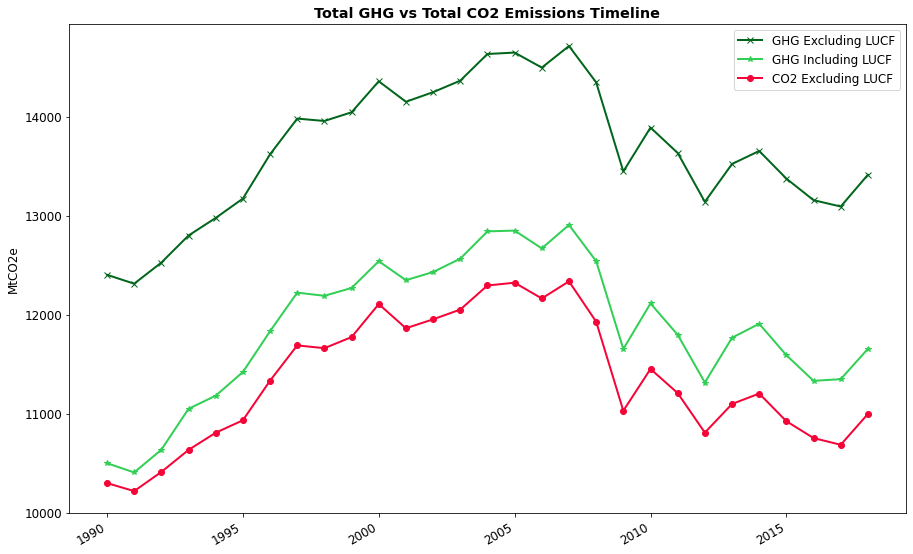

In [23]:
fig, axs = plt.subplots(figsize=(15,10))

axs.plot(group_years.index.to_list(), group_years["Total GHG Emissions Excluding LUCF (MtCO2e)"],linewidth ='2.0',color="#01661c", marker="x")
axs.plot(group_years.index.to_list(), group_years["Total GHG Emissions Including LUCF (MtCO2e)"],linewidth ='2.0',color="#32cf56", marker="*")
axs.plot(group_years.index.to_list(), group_years["Total CO2 (excluding LUCF) (MtCO2e)"],linewidth ='2.0', color="#F50537", marker="o")

axs.set_title("Total GHG vs Total CO2 Emissions Timeline", fontweight='bold')

axs.set_ylabel("MtCO2e")

axs.legend(["GHG Excluding LUCF","GHG Including LUCF","CO2 Excluding LUCF"])
plt.gcf().autofmt_xdate()
plt.show()

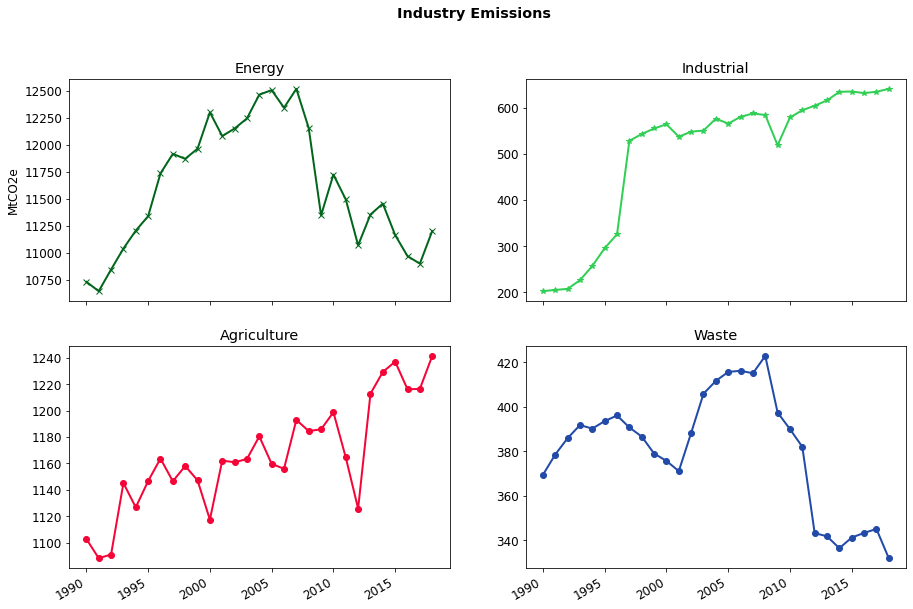

In [24]:
fig, axs = plt.subplots(2,2,figsize=(15,10), sharex=True)
fig.suptitle('Industry Emissions',fontweight='bold')
axs[0,0].plot(group_years.index.to_list(), group_years["Energy (MtCO2e)"],linewidth ='2.0',color="#01661c", marker="x")
axs[0,1].plot(group_years.index.to_list(), group_years["Industrial Processes (MtCO2e)"],linewidth ='2.0',color="#32cf56", marker="*")
axs[1,0].plot(group_years.index.to_list(), group_years["Agriculture (MtCO2e)"],linewidth ='2.0', color="#F50537", marker="o")
axs[1,1].plot(group_years.index.to_list(), group_years["Waste (MtCO2e)"],linewidth ='2.0', color="#224aa8", marker="o")

axs[0,0].set_title("Energy")
axs[0,1].set_title("Industrial")
axs[1,0].set_title("Agriculture")
axs[1,1].set_title("Waste")

axs[0,0].set_ylabel("MtCO2e")

plt.gcf().autofmt_xdate()
plt.show()